<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction



## Dataset Description
 
This is a dataset from Kaggle, with information on medical expenses for different people. It caputres important potential drivers of medical expenses like sex, smoker status and age.  This is a link to the dataset https://www.kaggle.com/datasets/mirichoi0218/insurance although I loaded it into my own cloud server.

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

**Content**

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance



In [1]:
# load standard libraries I think I may need.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Set a palette value for our Plots.
sns.set_palette("Reds")

# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [3]:
# Let's read the dataset from my personal cloud Linux server.
df = pd.read_csv("http://my-cunymsds.com/data605/data/medical.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# let's check for any missing values
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### No missing values and the dataset looks clean

In [6]:
# Some basic info on dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#some basic stats on the numeric values of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### The patients from which we have infomation range from 18 years of age to 64, with an average of 39. The mean medical charges is 13,270.

In [8]:
# Let's check the distribution of the data by region
df["region"].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
#Let's check the proportion of rows by age.
df["age"].value_counts(normalize=True).head()

18    0.051570
19    0.050822
50    0.021674
51    0.021674
47    0.021674
Name: age, dtype: float64

In [10]:
#Let's check the counts by sex
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
#let's check counts by Region
print(df.groupby("region").count())

           age  sex  bmi  children  smoker  charges
region                                             
northeast  324  324  324       324     324      324
northwest  325  325  325       325     325      325
southeast  364  364  364       364     364      364
southwest  325  325  325       325     325      325


In [12]:
#Let's do a crosstabulation by smoker and sex
pd.crosstab(df["smoker"], df["sex"], margins=True)

sex,female,male,All
smoker,,,
no,547,517,1064
yes,115,159,274
All,662,676,1338


#### The dataset looks well balance between regions and between sex.  The is 5:1 proportion of non-smoker vs smoker which probably represent closer the actual proportions in the population.

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [13]:
# Dataset looks very clean, but I will encode the categorical variables in a second data set in case I need for some visualizations
df2 = pd.get_dummies(df)
df2.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



# Part 1 - Matplotlib Plots

## Plot 1 - Boxplot

### We will use boxplots to view the distribution of medical expenses based on sex (male or female) and their smoker status (yes no smoker)

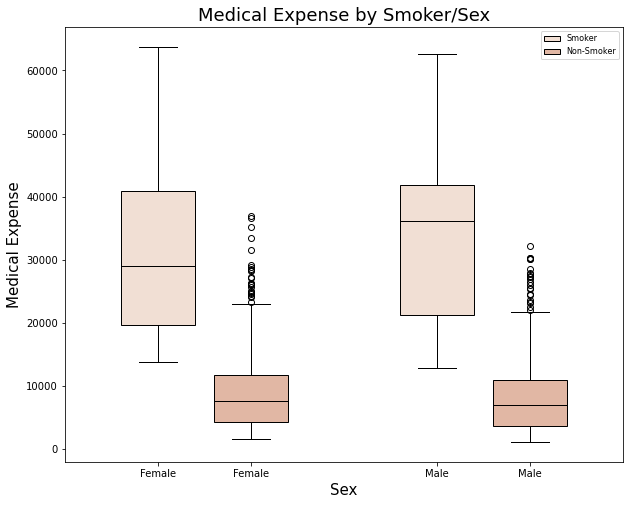

In [14]:
# We will define columns of data. Separating smokers between male and female. Same for non-smokers

columns_smoker = [df[(df["sex"]=="female") & (df["smoker"]=="yes")]["charges"],
                  df[(df["sex"]=="male") & (df["smoker"]=="yes")]["charges"]]

columns_non_smoker = [df[(df["sex"]=="female") & (df["smoker"]=="no")]["charges"],
                  df[(df["sex"]=="male") & (df["smoker"]=="no")]["charges"]]

# Color for for our boxplots
c1 = "#F1DFD4"
c2 = "#E1B7A4"

fig, ax = plt.subplots()

# Setting plot size in inches
fig.set_figheight(8)
fig.set_figwidth(10)

#Define first Boxplot for smokers. This box plot would show both Female and Male
bp1 = ax.boxplot(columns_smoker, positions=[1,2.5], widths=0.4,
            patch_artist=True,
            boxprops=dict(facecolor=c1, color="black"),
            medianprops=dict(color="black"),
                 labels = ["Female", "Male"]
           )

#Define Second Boxplot for non- smokers. This box plot would show both Female and Male
bp2 = ax.boxplot(columns_non_smoker, positions=[1.5,3], widths=0.4,
            patch_artist=True,
             boxprops=dict(facecolor=c2, color="black"),
            medianprops=dict(color="black"),
                 labels = ["Female", "Male"]
           )

# We will format the plot addint titles, legend and labels
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Smoker', 'Non-Smoker'], loc='upper right', fontsize=8)

plt.title(label="Medical Expense by Smoker/Sex",
          fontsize=18,
          color="black")
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Medical Expense",fontsize=15)

plt.show()

### The boxplot shows that there is a clear relationship between medical expenses and their smoker status.  We can clearly see that regardless of sex, medical charges are much higher for smokers than non-smokers. In fact even the MAX value in medical expenses is below the 75% percentile for females, and below trhe median for males.

## Plot 2 -Line Plot

### We will use a lineplot to review the relationship between BMI (Body Mass Index) and Age.  We would like to know if BMI increase or decreases with Age.

In [15]:
# We will use df.groupby() to group by BMI and calculate mean, standard deviation and count.\
# This is importan since we will need to calculate Confidence Intervals like Seaborn does it.

# We will define CI = mean +/- 1.96*STDEV / sqrt(n). 1.96 is for a 95% CI.
d = df.groupby("age")["bmi"].agg(["mean","std","count"])
d["ci1"] = d["mean"] - (1.96* d["std"]/np.sqrt(d["count"]))
d["ci2"] = d["mean"] + (1.96* d["std"]/np.sqrt(d["count"]))
d.head()

,mean,std,count,ci1,ci2
age,,,,,
18,31.326159,6.970188,69,29.681500,32.970819
19,28.596912,5.859832,68,27.204118,29.989706
20,30.632759,4.629494,29,28.947795,32.317722
21,28.185714,6.329480,28,25.841242,30.530186
22,31.087679,6.964901,28,28.507843,33.667514


#### Now that we have a dataframe with means and upper and lower confidence intervals we can plot it!

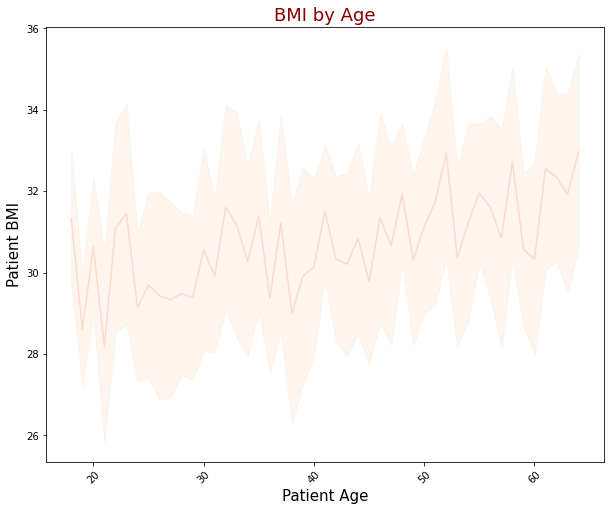

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

# Basic line plot showing means
ax.plot(d["mean"])

# We will use .fill_between method to show the CI's.
ax.fill_between(d.index, d["ci1"], d["ci2"], color='#fdecde', alpha=.5)

#Some basic formatting of titles, and labels.
plt.title(label="BMI by Age",
          fontsize=18,
          color="darkred")
plt.xlabel("Patient Age",fontsize=15)
plt.ylabel("Patient BMI",fontsize=15)
plt.xticks(rotation=45)
plt.show()

### We can see a postive relationship between Age and BMI (Body Mass Index). The older we grow, the fatter we grow it seems :)

# Part 2 - Seaborn Plots

We will attempt to generate in Seaborn the same plots we did above with Matplotlib

## Plot 1 - Boxplot with Seaborn

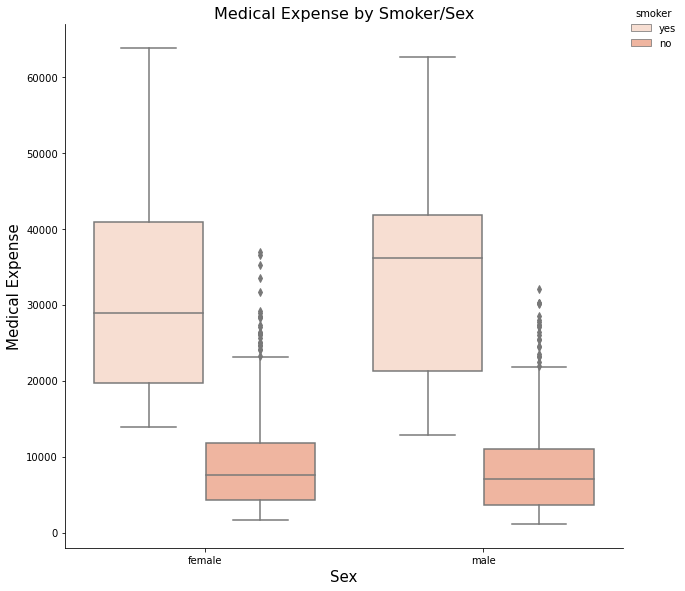

In [17]:
#For seaborn we will the catplot. Our categoricals X variable will be sex, and the variable to measure will be
# Medical expenses. We will use hue to create sub-group by Smoker status.

g= sns.catplot(x="sex",y="charges",data=df, kind="box", hue="smoker",height = 8, aspect = 1.1)

#Basic formatting of titles, labels and legend.
plt.title(label="Medical Expense by Smoker/Sex",
          fontsize=16,
          color="black")
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Medical Expense",fontsize=15)
sns.move_legend(g, "upper right")
plt.show()

## Plot 1 - Lineplot with Seaborn


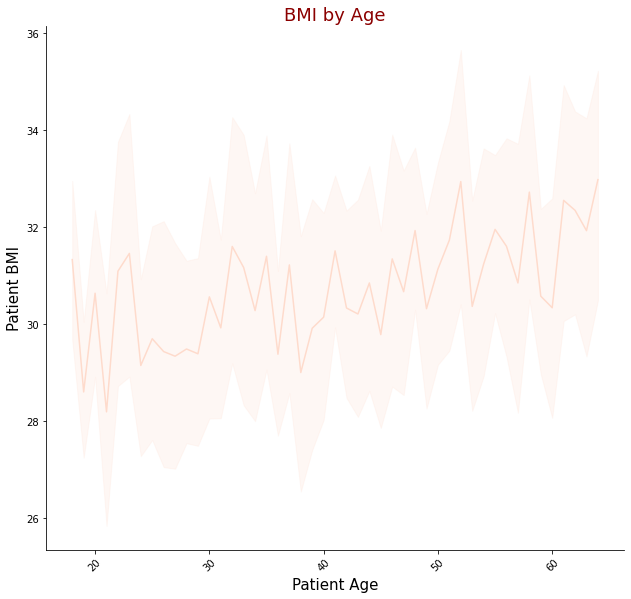

In [18]:
sns.set_palette("Reds")

# We will use relplot to plot age in our X axis, vs BMI in our y axis. Seaborn will draw a 95% CI.
sns.relplot(x="age",y="bmi",data=df, kind="line",height = 8, aspect = 1.1)

# Basic formatting of titles and labels.
plt.title(label="BMI by Age",
          fontsize=18,
          color="darkred")
plt.xlabel("Patient Age",fontsize=15)
plt.ylabel("Patient BMI",fontsize=15)
plt.xticks(rotation=45)

plt.show()

## A few other interesting Plots

### Histogram of medical expenses by smoker status.

Here we can again observe the clear impact of smoking and its associated medical expenses

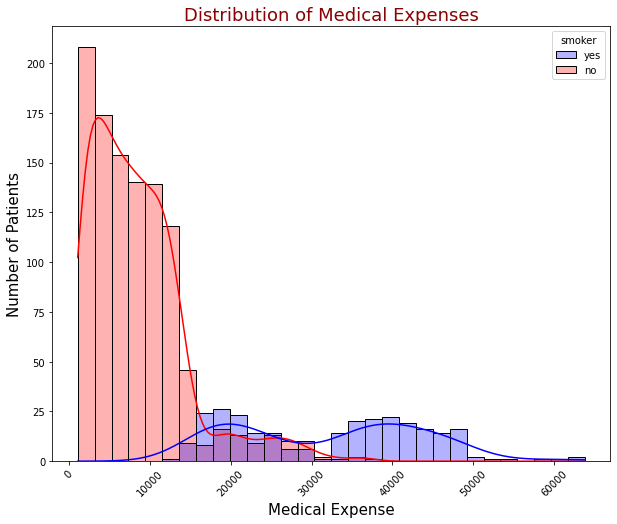

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
# Create an array with the colors you want to use
colors = ["blue", "red"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#We will use .hisplot to plot our medical expenses, applying hue to subgroup by smoking status.
g = sns.histplot(data=df, x="charges", hue="smoker",alpha=0.3, kde=True)

# Basic formatting
plt.title(label="Distribution of Medical Expenses",
          fontsize=18,
          color="darkred")
plt.xlabel("Medical Expense",fontsize=15)
plt.ylabel("Number of Patients",fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Scatter plot of BMI vs Medical expense sub-grouping by smoker status.

Here we find something interesting. That for non-smokers, it doesn't seem to be a relationship between BMI and medical expense.  It seemed pretty uniformly distributed.
That is not the case for smokers, where it show at sharp increase of medical expense as BMI goes up.

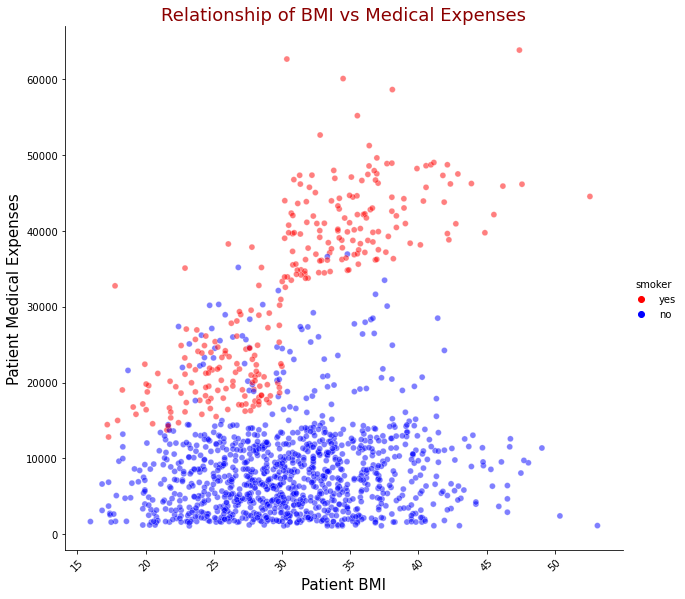

In [20]:

# Create an array with the colors you want to use
colors = ["red", "blue"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#We will use relplot fo scatterplot. Separating by smoker status using hue.
sns.relplot(x="bmi",y="charges",data=df, kind="scatter", hue="smoker", alpha=0.5,height = 8, aspect = 1.1)

#Basic formatting of title and labels.
plt.title(label="Relationship of BMI vs Medical Expenses",
          fontsize=18,
          color="darkred")
plt.xlabel("Patient BMI",fontsize=15)
plt.ylabel("Patient Medical Expenses",fontsize=15)
plt.xticks(rotation=45)

plt.show()

### Do people smoke more or less with age?

We will group our data by age and derive a column of proportion of smokers to check.

In [21]:
d2 = df2.groupby("age")[["smoker_yes","smoker_no"]].sum()
d2["smoker_prop"] = d2["smoker_yes"] / (d2["smoker_yes"]+d2["smoker_no"]) 
d2.head()

,smoker_yes,smoker_no,smoker_prop
age,,,
18,12,57,0.173913
19,18,50,0.264706
20,9,20,0.310345
21,2,26,0.071429
22,6,22,0.214286


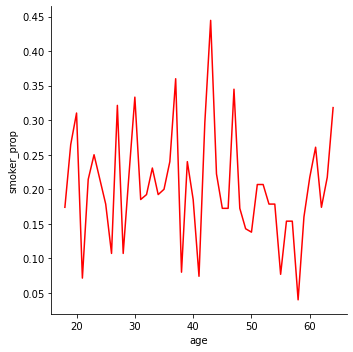

In [22]:
sns.relplot(x=d2.index, y=d2["smoker_prop"], kind="line")

It would seem there is an increasing trend of smoking untill people turn 40. Then it starts coming down untill people reach 60 when it goes up again. Interesting finding.

# Conclusions  

1.- We saw a very clear relationship between smoking and its impact on medical expenses. The combination of smoking and high BMI drives a very steep increase in observed medical expenses.

2. What was surprising is that for non-smokers we didn't find a clear increase relationship of medical expenses and BMI.

3. We didn't observe a large difference of between males and females in general.  By far smoking was the biggest driver of medical expenses.

4. Smoking seems to increase with age untill age 40, then it decrease untill age 60 when it increases again.

## Comparison Seabon vs Matplotlib
Seaborn seems to be much simple to produce good looking plots for general view, specially when using Pandas dataframes.  Matplotlib has much more control but you needs to work hards to produce a good looking plot like Seaborn's.
